In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
print("="*70)
print("t-SNE - Giam chieu va visualize du lieu")
print("="*70)

# Iris dataset
print("\n1. IRIS DATASET (150 samples, 4 features)")
iris_data = load_iris()
X_iris = iris_data.data
y_iris = iris_data.target

scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

tsne_iris = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_iris_tsne = tsne_iris.fit_transform(X_iris_scaled)
print("  Original: 150 x 4")
print("  t-SNE(2): 150 x 2")

kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_iris = kmeans_iris.fit_predict(X_iris_tsne)
print("  KMeans clustering successful")

t-SNE - Giam chieu va visualize du lieu

1. IRIS DATASET (150 samples, 4 features)
  Original: 150 x 4
  t-SNE(2): 150 x 2
  KMeans clustering successful


In [5]:
# Digits dataset
print("\n2. DIGITS DATASET (1797 samples, 64 features)")
digits_data = load_digits()
X_digits = digits_data.data

X_digits_scaled = StandardScaler().fit_transform(X_digits)

tsne_digits = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_digits_tsne = tsne_digits.fit_transform(X_digits_scaled)
print("  Original: 1797 x 64")
print("  t-SNE(2): 1797 x 2")

kmeans_digits = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_digits = kmeans_digits.fit_predict(X_digits_tsne)
print("  KMeans clustering successful")


2. DIGITS DATASET (1797 samples, 64 features)
  Original: 1797 x 64
  t-SNE(2): 1797 x 2
  KMeans clustering successful


In [6]:
# Fashion MNIST (20 samples mau)
print("\n3. FASHION MNIST (70000 samples, 784 features)")
from sklearn.datasets import fetch_openml
try:
    fashion = fetch_openml('Fashion-MNIST', version=1, parser='auto', as_frame=False)
    X_fashion = fashion.data[:3000]
    y_fashion = fashion.target[:3000]
    
    X_fashion_scaled = StandardScaler().fit_transform(X_fashion)
    
    tsne_fashion = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
    X_fashion_tsne = tsne_fashion.fit_transform(X_fashion_scaled)
    print("  Original: 3000 x 784")
    print("  t-SNE(2): 3000 x 2")
    
    kmeans_fashion = KMeans(n_clusters=10, random_state=42, n_init=10)
    labels_fashion = kmeans_fashion.fit_predict(X_fashion_tsne)
    print("  KMeans clustering successful")
    
    use_fashion = True
except:
    print("  Cannot fetch Fashion-MNIST, using Digits instead")
    use_fashion = False


3. FASHION MNIST (70000 samples, 784 features)
  Original: 3000 x 784
  t-SNE(2): 3000 x 2
  KMeans clustering successful


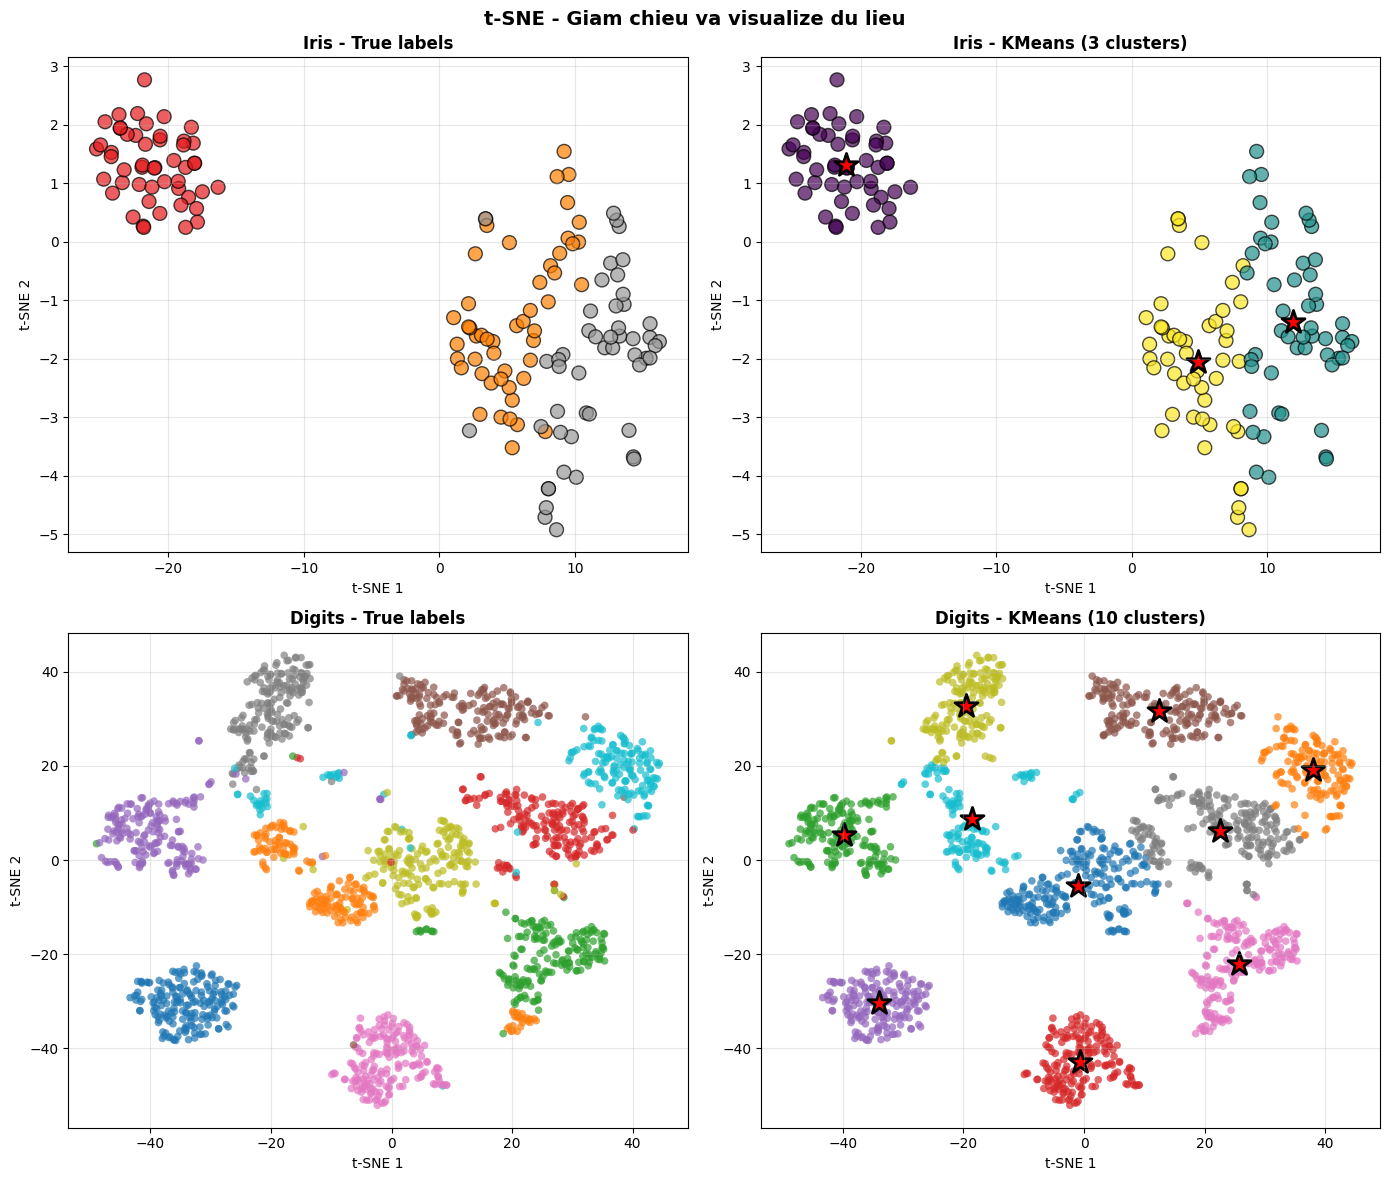

In [7]:

# Ve hinh
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('t-SNE - Giam chieu va visualize du lieu', fontsize=14, fontweight='bold')

# Iris - True labels
ax1 = axes[0, 0]
scatter1 = ax1.scatter(X_iris_tsne[:, 0], X_iris_tsne[:, 1], c=y_iris, cmap='Set1', s=100, alpha=0.7, edgecolors='k')
ax1.set_title('Iris - True labels', fontweight='bold')
ax1.set_xlabel('t-SNE 1')
ax1.set_ylabel('t-SNE 2')
ax1.grid(alpha=0.3)

# Iris - KMeans clustering
ax2 = axes[0, 1]
scatter2 = ax2.scatter(X_iris_tsne[:, 0], X_iris_tsne[:, 1], c=labels_iris, cmap='viridis', s=100, alpha=0.7, edgecolors='k')
ax2.scatter(kmeans_iris.cluster_centers_[:, 0], kmeans_iris.cluster_centers_[:, 1], 
           c='red', s=300, marker='*', edgecolors='black', linewidths=2)
ax2.set_title('Iris - KMeans (3 clusters)', fontweight='bold')
ax2.set_xlabel('t-SNE 1')
ax2.set_ylabel('t-SNE 2')
ax2.grid(alpha=0.3)

# Digits - True labels
ax3 = axes[1, 0]
scatter3 = ax3.scatter(X_digits_tsne[:, 0], X_digits_tsne[:, 1], c=digits_data.target, cmap='tab10', s=30, alpha=0.7, edgecolors='none')
ax3.set_title('Digits - True labels', fontweight='bold')
ax3.set_xlabel('t-SNE 1')
ax3.set_ylabel('t-SNE 2')
ax3.grid(alpha=0.3)

# Digits - KMeans clustering
ax4 = axes[1, 1]
scatter4 = ax4.scatter(X_digits_tsne[:, 0], X_digits_tsne[:, 1], c=labels_digits, cmap='tab10', s=30, alpha=0.7, edgecolors='none')
ax4.scatter(kmeans_digits.cluster_centers_[:, 0], kmeans_digits.cluster_centers_[:, 1], 
           c='red', s=300, marker='*', edgecolors='black', linewidths=2)
ax4.set_title('Digits - KMeans (10 clusters)', fontweight='bold')
ax4.set_xlabel('t-SNE 1')
ax4.set_ylabel('t-SNE 2')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()